# Question 2

#### Set up a K-means clustering algorithm to GROUP the given dataset and identify the optimal number of clusters.  

#### Load and analyse data

In [1]:
# import the common libraries 

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('dataset_Q2.csv')

In [3]:
df.head()

,x1,x2,x3,x4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    float64
 1   x2      100 non-null    float64
 2   x3      100 non-null    float64
 3   x4      100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB


In [5]:
df.isnull().sum()

x1    0
x2    0
x3    0
x4    0
dtype: int64

In [6]:
df.describe()

,x1,x2,x3,x4
count,100.000000,100.000000,100.000000,100.000000
mean,5.797000,3.201000,3.507000,1.136000
std,0.945319,0.417906,2.095221,0.918114
min,4.300000,2.200000,1.000000,0.100000
25%,5.000000,3.000000,1.500000,0.200000
50%,5.700000,3.200000,3.200000,1.000000
75%,6.500000,3.425000,5.525000,2.000000
max,7.900000,4.400000,6.900000,2.500000


#### Note

There is some variation in the magnitude of the data. Since K means is a distanced based algorithm, they might cause some problem. Thus, we will scale them. 

In [7]:
# scale the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3
0,-0.741032,0.719076,-1.010688,-1.024617
1,-0.953667,-0.483392,-1.010688,-1.024617
2,-1.166301,-0.002405,-1.058656,-1.024617
3,-1.272619,-0.242899,-0.962720,-1.024617
4,-0.847349,0.959570,-1.010688,-1.024617


In [8]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB


Pairplot of the scaled data


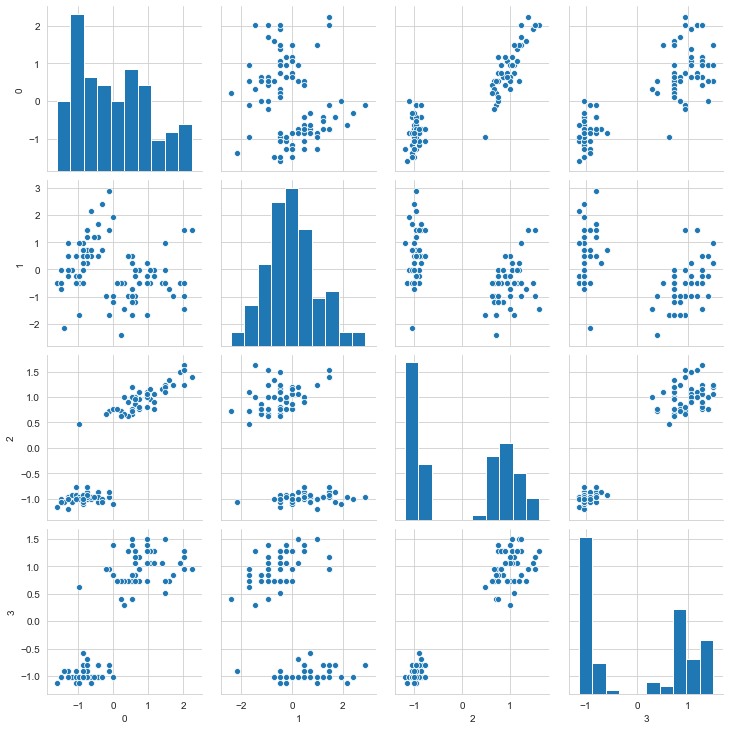

In [9]:
sns.set_style('whitegrid')
print("Pairplot of the scaled data")
sns.pairplot(df_scaled, palette ='coolwarm')

Pairplot of the normal data


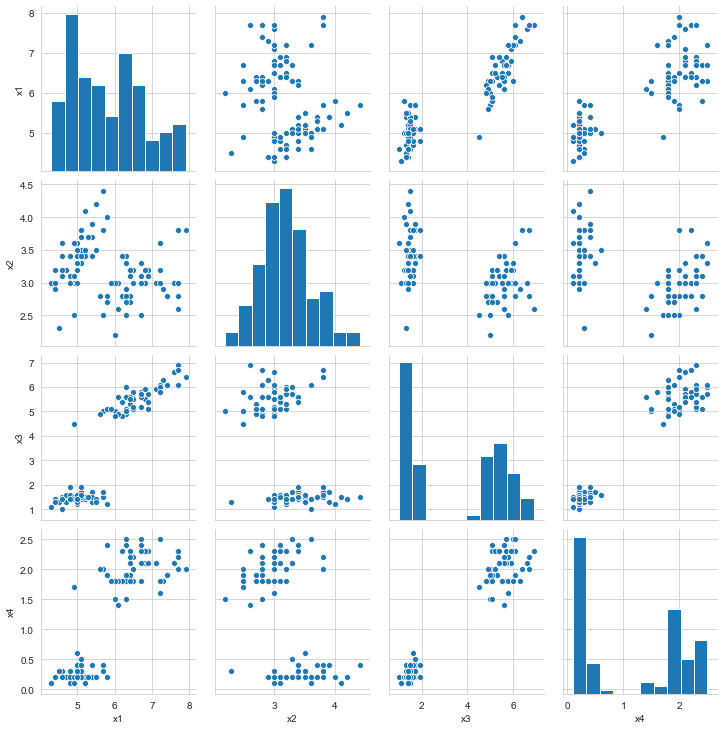

In [10]:
sns.set_style('whitegrid')
print("Pairplot of the normal data")
sns.pairplot(df, palette ='coolwarm')

#### Note:

The pairplot of the scaled data and the normal data both show the same distribution of the data.  Thus, we can proceed with confidence that scaling has not changed the nature of the data.

#### K-means clustering  

In [11]:
# import k-means clustering 

from sklearn.cluster import KMeans

In [13]:
# Searching for the elbow, finding the right (optimal) Kmeans

searching_elbow = []

for i in range(2,14):
    elbow_kmeans = KMeans(n_clusters = i)
    elbow_kmeans.fit(df_scaled)
    searching_elbow.append(elbow_kmeans.inertia_)

Text(0, 0.5, 'within cluster sum squares')

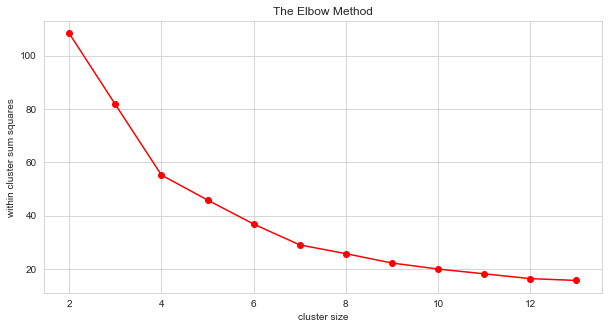

In [14]:
plt.figure(figsize=(10,5))
plt.plot(range(2,14),searching_elbow,"o-", color='red')
plt.title('The Elbow Method')
plt.xlabel('cluster size')
plt.ylabel('within cluster sum squares')

By plotting the k against the SSE, we are able to see the error decrease as the k (number of cluster) increase. 
The optimal k values would thus logically be the value at which any more increase in the k value would not get that
much more information. The k value at which we are not going to significantly decrease the within cluster Sum of Squared Error 
by increasing the number of clusters. (Elbow Method)

Thus, the optimal K value would be 5. 

#### Predict and performance measures  

In [15]:
# import metrics 

from sklearn import metrics 

In [18]:
# Run the K means algo with the optimal K value that was obtained 

kms7 = KMeans(n_clusters = 7)
kms7_pred = kms7.fit_predict(df_scaled)
kms7_labels = kms7.labels_
print(" 7 k-Means Silhouette score :", metrics.silhouette_score(df_scaled, kms7_labels, metric='euclidean'))

 7 k-Means Silhouette score : 0.42304490124265315


In [20]:
# Run the K means algo with the optimal K value that was obtained 

kms4 = KMeans(n_clusters = 4)
kms4_pred = kms4.fit_predict(df_scaled)
kms4_labels = kms4.labels_
print(" 4 k-Means Silhouette score :", metrics.silhouette_score(df_scaled, kms4_labels, metric='euclidean'))

 4 k-Means Silhouette score : 0.41024417775809036


In [21]:
# Run the K means algo with the optimal K value that was obtained 

kms8 = KMeans(n_clusters = 8)
kms8_pred = kms8.fit_predict(df_scaled)
kms8_labels = kms8.labels_
print(" 8 k-Means Silhouette score :", metrics.silhouette_score(df_scaled, kms8_labels, metric='euclidean'))

 8 k-Means Silhouette score : 0.3895460267636336


#### Explanation:

The above analysis just simply proves that the K value of 7 is the most optimal. Nothing more and nothing less.

In [25]:
print(kms7.labels_)

[3 1 1 1 3 2 3 3 1 1 2 3 1 1 2 2 2 3 2 2 3 3 3 3 3 1 3 3 3 1 1 3 2 2 1 1 3
 3 1 3 3 1 1 3 2 1 2 1 2 3 0 4 5 4 0 5 4 5 4 6 0 4 0 4 4 0 0 6 5 4 0 4 5 4
 0 5 4 4 4 5 5 6 4 4 4 5 0 0 4 0 0 0 4 0 0 0 4 0 0 4]


In [26]:
len(kms7.labels_)

100

In [28]:
cluster = kms7.labels_

In [29]:
df_scaled["Cluster"] = cluster
df_scaled.head()

,0,1,2,3,Cluster
0,-0.741032,0.719076,-1.010688,-1.024617,3
1,-0.953667,-0.483392,-1.010688,-1.024617,1
2,-1.166301,-0.002405,-1.058656,-1.024617,1
3,-1.272619,-0.242899,-0.962720,-1.024617,1
4,-0.847349,0.959570,-1.010688,-1.024617,3


In [30]:
df_scaled.tail()

,0,1,2,3,Cluster
95,0.960046,-0.483392,0.812100,1.274203,0
96,0.534776,-1.685861,0.716164,0.836333,4
97,0.747411,-0.483392,0.812100,0.945800,0
98,0.428459,0.478583,0.908036,1.274203,0
99,0.109507,-0.483392,0.764132,0.726865,4


#### Determine which cluster the following data points belong to

##### (i) x1 = 5, x2 = 3.25, x3 = 1.4, x4 = 0.2 

In [ ]:
predict_1 = km5.predict([[5,3.25,1.4,0.2]])

In [ ]:
print(predict_1 + 1)

##### (ii) x1 = 4.65, x2 = 3.15, x3 = 1.4, x4 = 0.3 

In [ ]:
predict_2 = km5.predict([[4.65,3.15,1.4,0.3]])
print(predict_2 + 1)

##### (iii) x1 = 5.8, x2 = 3.3, x3 = 5.3, x4 = 2.2 

In [ ]:
predict_3 = km5.predict([[5.8,3.3,5.3,2.2]])
print(predict_3 + 1)

##### (iv) x1 = 4.9, x2 = 3.7, x3 = 6.1, x4 = 1.9 

In [ ]:
predict_4 = km5.predict([[4.9,3.7,6.1,1.9]])
print(predict_4 + 1)

# Alternatively

In [31]:
make_prediction = [[5,3.25,1.4,0.2],[4.65,3.15,1.4,0.3],[5.8,3.3,5.3,2.2],[4.9,3.7,6.1,1.9]]
make_prediction

[[5, 3.25, 1.4, 0.2],
 [4.65, 3.15, 1.4, 0.3],
 [5.8, 3.3, 5.3, 2.2],
 [4.9, 3.7, 6.1, 1.9]]

In [33]:
make_prediction = pd.DataFrame(make_prediction, columns = ['x1','x2','x3','x4'])

In [34]:
make_prediction

,x1,x2,x3,x4
0,5.00,3.25,1.4,0.2
1,4.65,3.15,1.4,0.3
2,5.80,3.30,5.3,2.2
3,4.90,3.70,6.1,1.9


In [36]:
scaler1 = StandardScaler()
make_prediction_scaled = scaler1.fit_transform(make_prediction)
make_prediction_scaled

array([[-0.20317613, -0.47809144, -0.9914574 , -1.04750391],
       [-1.01588064, -0.95618289, -0.9914574 , -0.93724034],
       [ 1.65443419, -0.23904572,  0.80700021,  1.15776748],
       [-0.43537742,  1.67332005,  1.17591459,  0.82697677]])

In [41]:
scaled_prediction = pd.DataFrame(make_prediction_scaled, columns = ['x1','x2','x3','x4'])
scaled_prediction

,x1,x2,x3,x4
0,-0.203176,-0.478091,-0.991457,-1.047504
1,-1.015881,-0.956183,-0.991457,-0.937240
2,1.654434,-0.239046,0.807000,1.157767
3,-0.435377,1.673320,1.175915,0.826977


In [42]:
scaled_prediction.head(1)

,x1,x2,x3,x4
0,-0.203176,-0.478091,-0.991457,-1.047504


In [43]:
clus_pred = kms7.predict(scaled_prediction)
print(clus_pred)

[1 1 5 0]


In [44]:
scaled_prediction["Cluster prediction"] = clus_pred

In [45]:
scaled_prediction

,x1,x2,x3,x4,Cluster prediction
0,-0.203176,-0.478091,-0.991457,-1.047504,1
1,-1.015881,-0.956183,-0.991457,-0.937240,1
2,1.654434,-0.239046,0.807000,1.157767,5
3,-0.435377,1.673320,1.175915,0.826977,0
